In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
from src.pokemon import Pokemon, PokemonFactory, StatusEffect
from src.catching import attempt_catch

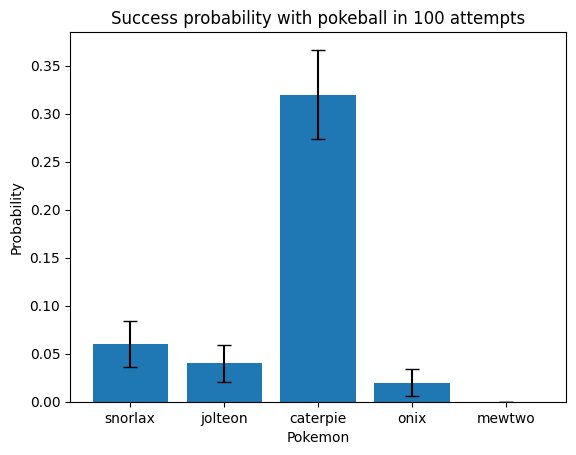

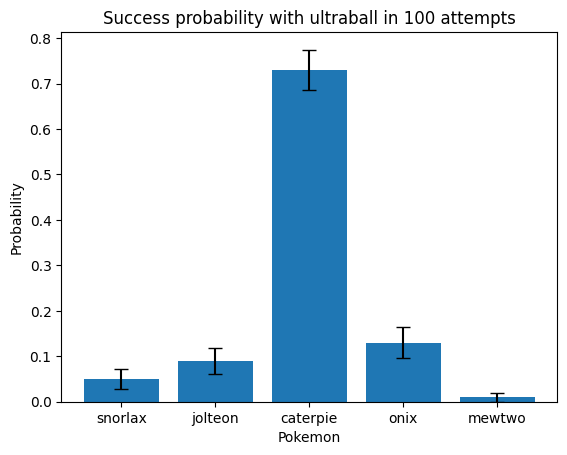

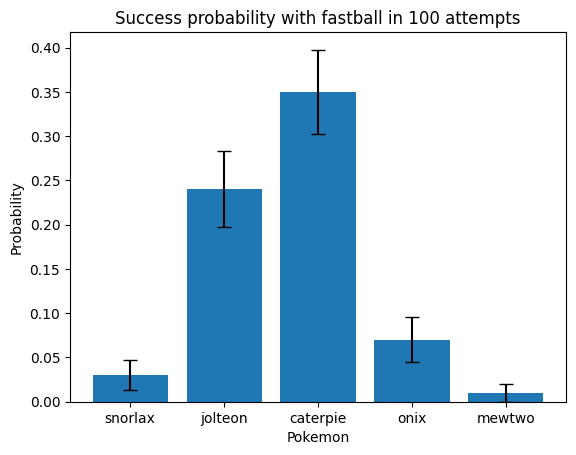

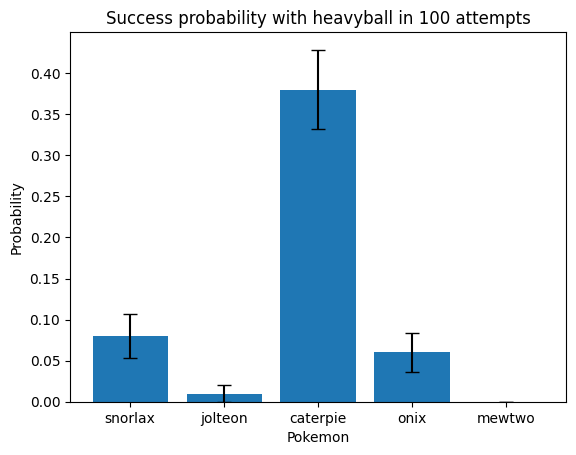

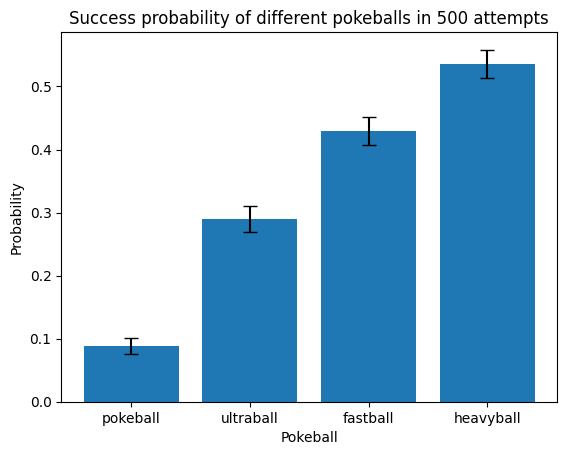

In [4]:
# Ejercicio 1

# Creo la instancia de PokemonFactory
factory = PokemonFactory("pokemon.json")

# Creo las instancias de todos los Pokemones
snorlax = factory.create("snorlax", 100, StatusEffect.NONE, 1)
jolteon = factory.create("jolteon", 100, StatusEffect.NONE, 1)
caterpie = factory.create("caterpie", 100, StatusEffect.NONE, 1)
onix = factory.create("onix", 100, StatusEffect.NONE, 1)
mewtwo = factory.create("mewtwo", 100, StatusEffect.NONE, 1)

# Creo una lista que contenga a los Pokemones
pokemons = [snorlax,jolteon, caterpie, onix, mewtwo]
# Creo una lista que contenga a los nombres Pokemones (se usa mas que nada para los graficos)
pokemons_names = ["snorlax","jolteon", "caterpie", "onix", "mewtwo"]
# Creo una lista que contenga los nombres de las Pokebolas
pokeballs = ["pokeball", "ultraball", "fastball", "heavyball"]

# Defino el numero de intentos de atrapar cada Pokemon con cada Pokeball
num_runs = 100
# Calculo el numero total de atrapadas para cada tipo de Pokebola
pokeball_runs = num_runs*len(pokemons)

# Creo listas vacias para almacenar probabilidades de success y de error
pokeball_success_probs = []
pokeball_error_probs = []
# Creo una variable para alamcenar el numero total de atrapadas exitosas
pokeball_success = 0

# Para cada Pokebola
for pokeball in pokeballs:
    success_probs = []
    error_probs = []
    # Agarro un Pokemon
    for pokemon in pokemons:
        successes = 0
        # Agarro un numero de intento (1, 2, 3, ...) para intentar de agarra al Pokemon con esa Pokebola
        for i in range(num_runs):
            success, prob = attempt_catch(pokemon,pokeball)
            if success:
                successes += 1
                pokeball_success += 1
        success_prob = successes / num_runs
        # Calculo la probabilidad de error estandar utilizando la formula de la desviacion estandar de la distribucion normal
        error_prob = np.sqrt(success_prob * (1 - success_prob) / num_runs)
        success_probs.append(success_prob)
        error_probs.append(error_prob)
    plt.bar(pokemons_names, success_probs, yerr=error_probs, capsize=5)
    plt.xlabel('Pokemon')
    plt.ylabel('Probability')
    plt.title('Success probability with {} in {} attempts'.format(pokeball, num_runs))
    plt.show()
    pokeball_success_prob = pokeball_success/pokeball_runs
    pokeball_error_prob = np.sqrt(pokeball_success_prob * (1 - pokeball_success_prob) / pokeball_runs)
    pokeball_success_probs.append(pokeball_success_prob)
    pokeball_error_probs.append(pokeball_error_prob)
plt.bar(pokeballs, pokeball_success_probs, yerr=[pokeball_error_probs, pokeball_error_probs], capsize=5)
plt.xlabel('Pokeball')
plt.ylabel('Probability')
plt.title('Success probability of different pokeballs in {} attempts'.format(pokeball_runs))
plt.show()


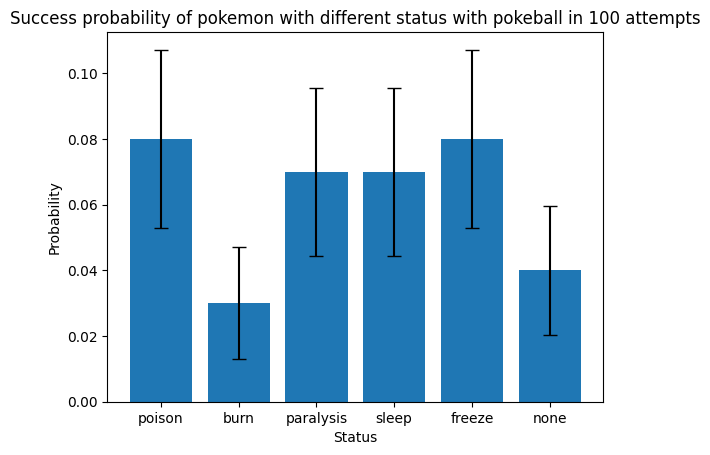

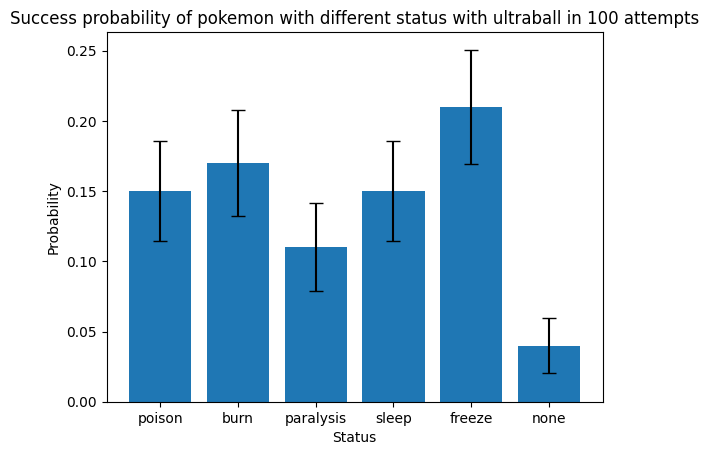

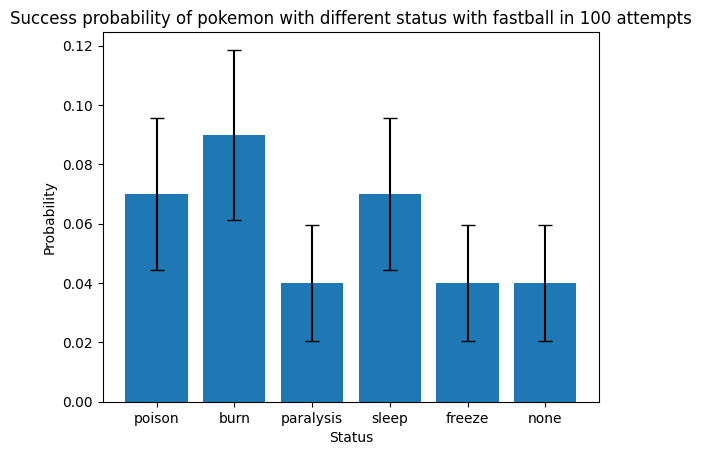

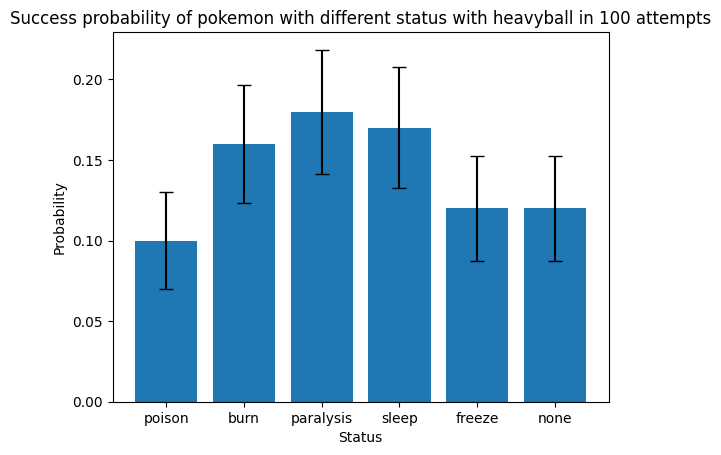

In [5]:
# Ejercicio 2.a

factory = PokemonFactory("pokemon.json")
poison = factory.create("snorlax", 100, StatusEffect.POISON, 1)
burn = factory.create("snorlax", 100, StatusEffect.BURN, 1)
paralysis = factory.create("snorlax", 100, StatusEffect.PARALYSIS, 1)
sleep = factory.create("snorlax", 100, StatusEffect.SLEEP, 1)
freeze = factory.create("snorlax", 100, StatusEffect.FREEZE, 1)
none = factory.create("snorlax", 100, StatusEffect.NONE, 1)

pokemons = [poison,burn, paralysis, sleep, freeze, none]
pokemons_names=["poison","burn", "paralysis", "sleep", "freeze", "none"]
pokeballs=["pokeball", "ultraball", "fastball", "heavyball"]
num_runs = 100
for pokeball in pokeballs:
    success_probs = []
    error_probs = []
    for pokemon in pokemons:
        successes = 0
        for i in range(num_runs):
            success, prob = attempt_catch(pokemon,pokeball)
            if success:
                successes += 1
        success_prob = successes / num_runs
        error_prob = np.sqrt(success_prob * (1 - success_prob) / num_runs)
        success_probs.append(success_prob)
        error_probs.append(error_prob)
    plt.bar(pokemons_names, success_probs, yerr=error_probs, capsize=5)
    plt.xlabel('Status')
    plt.ylabel('Probability')
    plt.title('Success probability of pokemon with different status with {} in {} attempts'.format(pokeball, num_runs))
    plt.show()


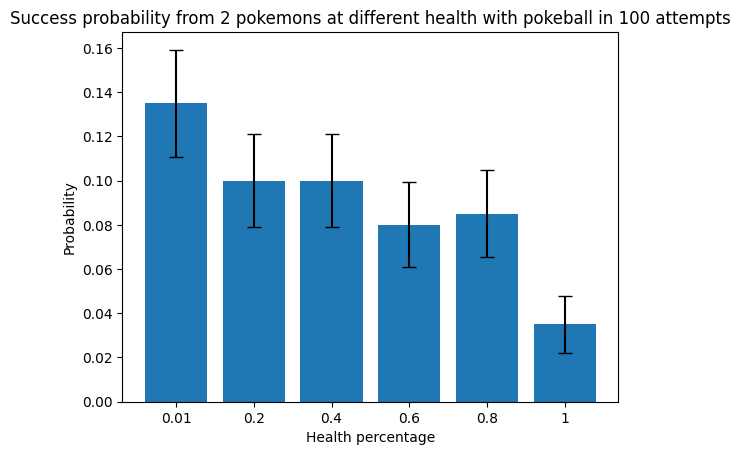

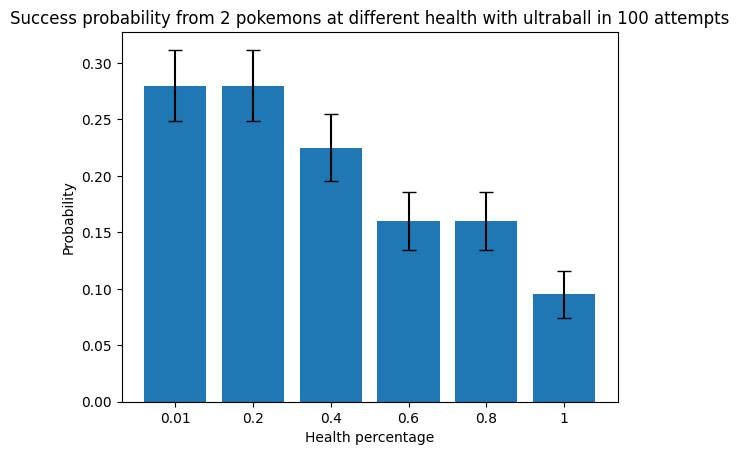

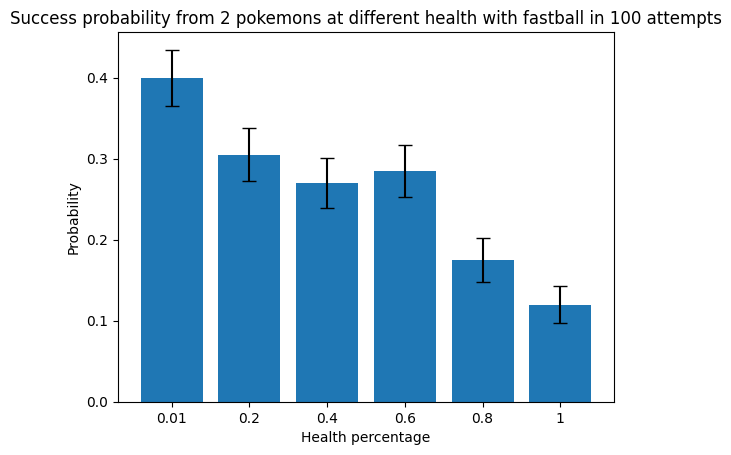

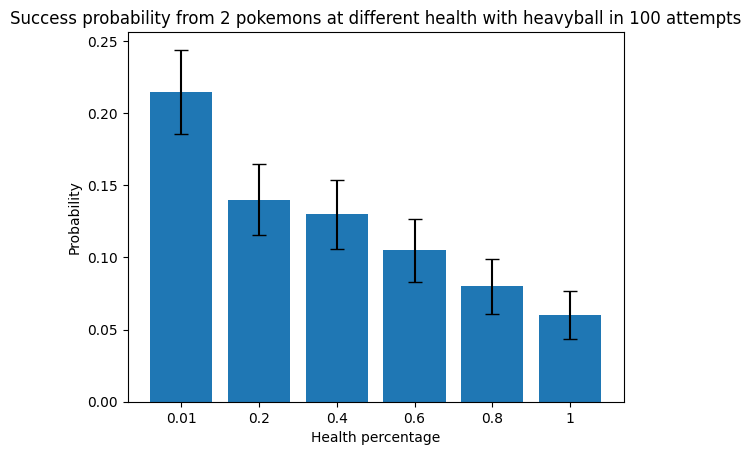

In [6]:
# Ejercicio 2.b

factory = PokemonFactory("pokemon.json")
snorlax1 = factory.create("snorlax", 100, StatusEffect.NONE, 0.01)
jolteon1 = factory.create("jolteon", 100, StatusEffect.NONE, 0.01)
snorlax2 = factory.create("snorlax", 100, StatusEffect.NONE, 0.2)
jolteon2 = factory.create("jolteon", 100, StatusEffect.NONE, 0.2)
snorlax3 = factory.create("snorlax", 100, StatusEffect.NONE, 0.4)
jolteon3 = factory.create("jolteon", 100, StatusEffect.NONE, 0.4)
snorlax4 = factory.create("snorlax", 100, StatusEffect.NONE, 0.6)
jolteon4 = factory.create("jolteon", 100, StatusEffect.NONE, 0.6)
snorlax5 = factory.create("snorlax", 100, StatusEffect.NONE, 0.8)
jolteon5 = factory.create("jolteon", 100, StatusEffect.NONE, 0.8)
snorlax6 = factory.create("snorlax", 100, StatusEffect.NONE, 1)
jolteon6 = factory.create("jolteon", 100, StatusEffect.NONE, 1)



pokemon_groups = [[snorlax1,jolteon1],[snorlax2,jolteon2], [snorlax3,jolteon3], [snorlax4,jolteon4], [snorlax5,jolteon5],[snorlax6,jolteon6]]
pokemons_names=["0.01","0.2", "0.4", "0.6", "0.8","1"]
pokeballs=["pokeball", "ultraball", "fastball", "heavyball"]
num_runs = 100
pokemon_groups_run=num_runs*2
for pokeball in pokeballs:
    success_probs = []
    error_probs = []
    for pokemons in pokemon_groups:
        successes = 0
        for pokemon in pokemons:
            for i in range(num_runs):
                success, prob = attempt_catch(pokemon,pokeball)
                if success:
                    successes += 1
        success_prob = successes / pokemon_groups_run
        error_prob = np.sqrt(success_prob * (1 - success_prob) / pokemon_groups_run)
        success_probs.append(success_prob)
        error_probs.append(error_prob)
    plt.bar(pokemons_names, success_probs, yerr=error_probs, capsize=5)
    plt.xlabel('Health percentage')
    plt.ylabel('Probability')
    plt.title('Success probability from 2 pokemons at different health with {} in {} attempts'.format(pokeball, num_runs))
    plt.show()

0.18
0.09
0.05
0.04
0.04
0.02


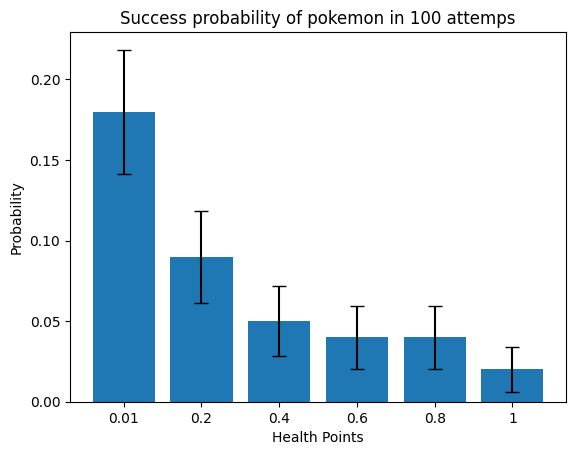

0.07
0.07
0.06
0.08
0.05
0.0


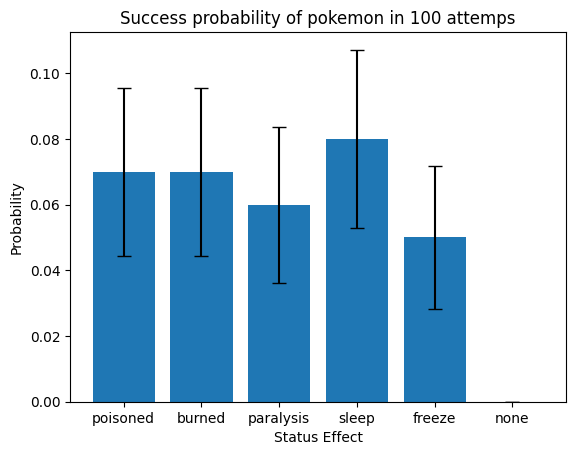

0.06
0.08
0.07
0.03
0.03
0.08


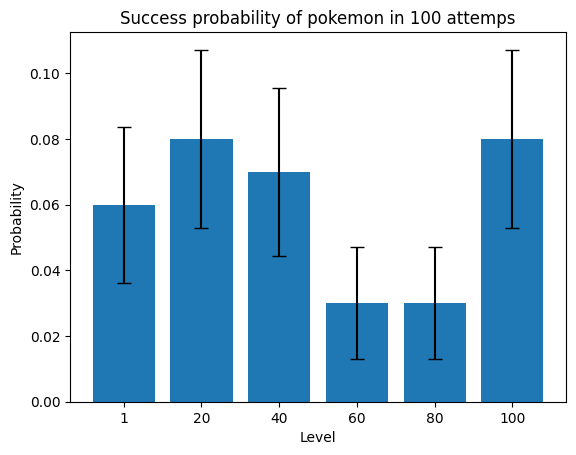

0.02
0.07
0.27
0.04
0.03


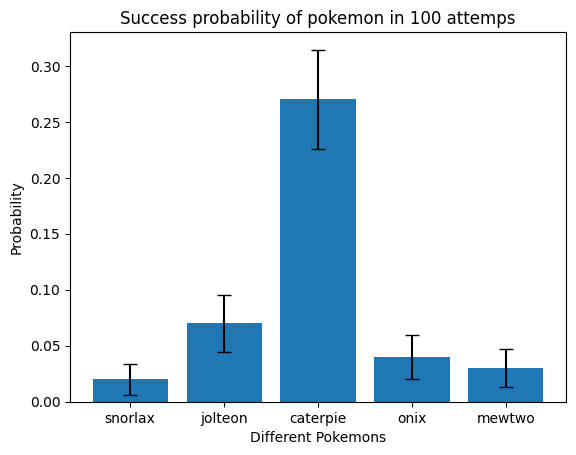

In [14]:
factory = PokemonFactory("pokemon.json")
#Mismo pokemon,nivel y estado. Variacion en la vida
snorlax1 = factory.create("snorlax", 100, StatusEffect.NONE, 0.01)
snorlax2 = factory.create("snorlax", 100, StatusEffect.NONE, 0.2)
snorlax3 = factory.create("snorlax", 100, StatusEffect.NONE, 0.4)
snorlax4 = factory.create("snorlax", 100, StatusEffect.NONE, 0.6)
snorlax5 = factory.create("snorlax", 100, StatusEffect.NONE, 0.8)
snorlax6 = factory.create("snorlax", 100, StatusEffect.NONE, 1)

#Mismo pokemon,nivel y vida. Variacion en el estado
snorlax7 = factory.create("snorlax", 100, StatusEffect.POISON, 1)
snorlax8 = factory.create("snorlax", 100, StatusEffect.BURN , 1)
snorlax9 = factory.create("snorlax", 100, StatusEffect.PARALYSIS, 1)
snorlax10 = factory.create("snorlax", 100, StatusEffect.SLEEP, 1)
snorlax11 = factory.create("snorlax", 100, StatusEffect.FREEZE, 1)
snorlax12 = factory.create("snorlax", 100, StatusEffect.NONE, 1)

#Mismo pokemon,vida y estado. Variacion en el nivel
snorlax13 = factory.create("snorlax", 1, StatusEffect.NONE, 1)
snorlax14 = factory.create("snorlax", 20, StatusEffect.NONE , 1)
snorlax15 = factory.create("snorlax", 40, StatusEffect.NONE, 1)
snorlax16 = factory.create("snorlax", 60, StatusEffect.NONE, 1)
snorlax17 = factory.create("snorlax", 80, StatusEffect.NONE, 1)
snorlax18 = factory.create("snorlax", 100, StatusEffect.NONE, 1)

#Distinto pokemon, misma vida,estado y nivel
snorlax = factory.create("snorlax", 100, StatusEffect.NONE, 1)
jolteon = factory.create("jolteon", 100, StatusEffect.NONE, 1)
caterpie = factory.create("caterpie", 100, StatusEffect.NONE, 1)
onix = factory.create("onix", 100, StatusEffect.NONE, 1)
mewtwo = factory.create("mewtwo", 100, StatusEffect.NONE, 1)


pokemon_groups = [[snorlax1,snorlax2,snorlax3,snorlax4,snorlax5,snorlax6],[snorlax7,snorlax8,snorlax9,snorlax10,snorlax11,snorlax12],[snorlax13,snorlax14,snorlax15,snorlax16,snorlax17,snorlax18], [snorlax,jolteon,caterpie,onix,mewtwo]]
paramter_changed = ["Health Points","Status Effect","Level","Different Pokemons"]
pokeball="pokeball"
num_runs = 100
pokemons_names=[["0.01","0.2", "0.4", "0.6", "0.8","1"],["poisoned","burned","paralysis", "sleep", "freeze","none"],["1","20", "40", "60", "80","100"],["snorlax","jolteon", "caterpie", "onix", "mewtwo"]]
prob_variation = []
for index, pokemons in enumerate(pokemon_groups):
    success_probs = []
    error_probs = []
    for pokemon in pokemons:  
        successes = 0  
        for i in range(num_runs):
            success, prob = attempt_catch(pokemon,pokeball)
            if success:
                successes += 1
        success_prob = successes / num_runs
        error_prob = np.sqrt(success_prob * (1 - success_prob) / num_runs)
        success_probs.append(success_prob)
        error_probs.append(error_prob)
    #prob_variation.append(np.mean(np.array(success_probs)))
    plt.bar(pokemons_names[index], success_probs, yerr=error_probs, capsize=5)
    plt.xlabel(paramter_changed[index])
    plt.ylabel('Probability')
    plt.title('Success probability of pokemon in {} attemps'.format(num_runs))
    plt.show()



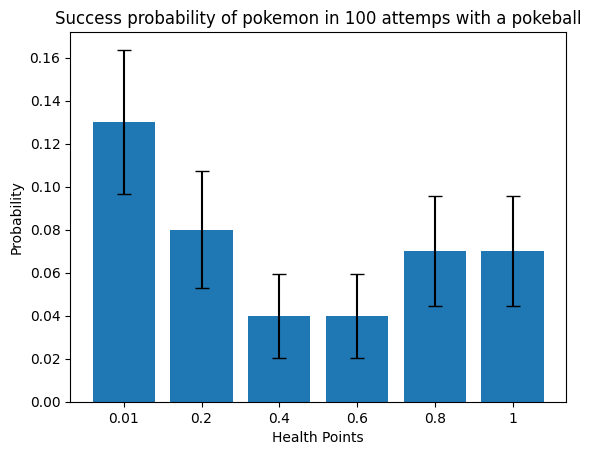

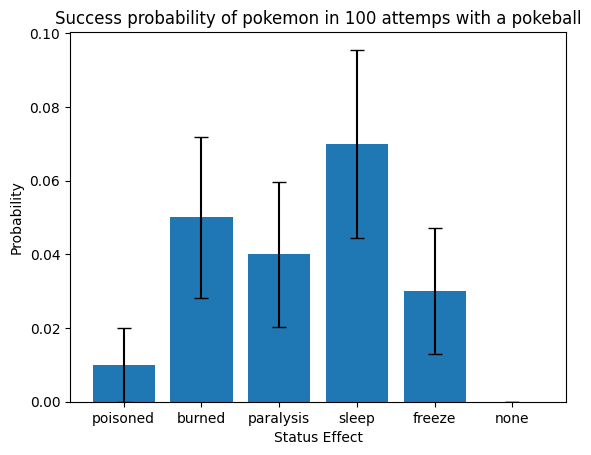

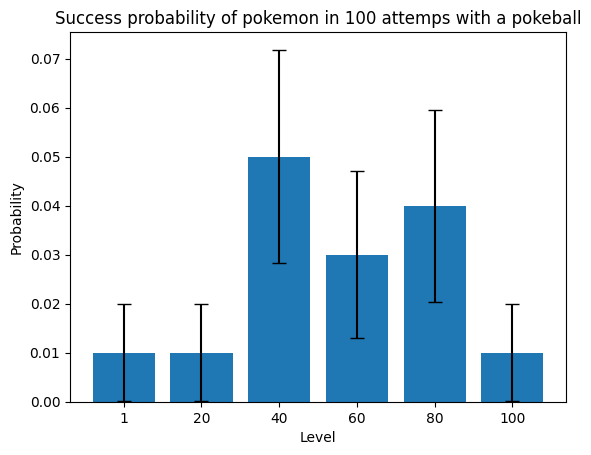

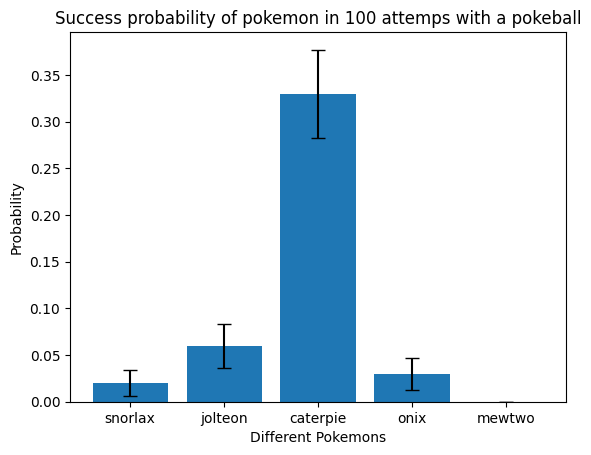

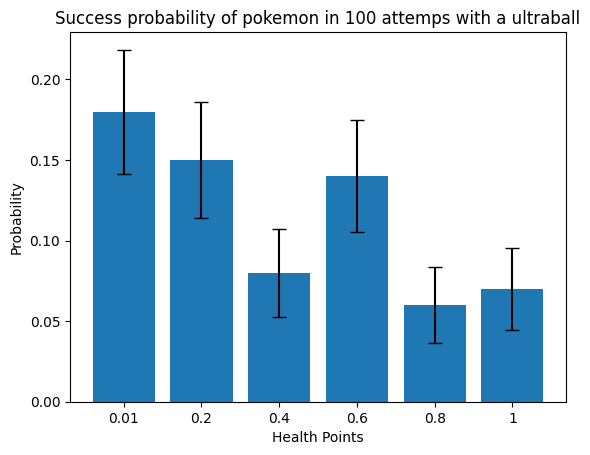

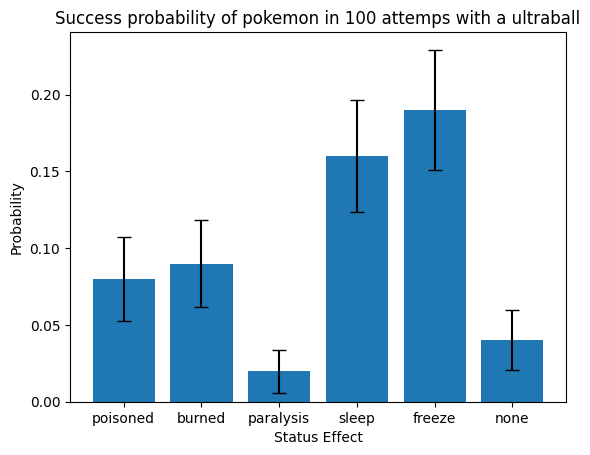

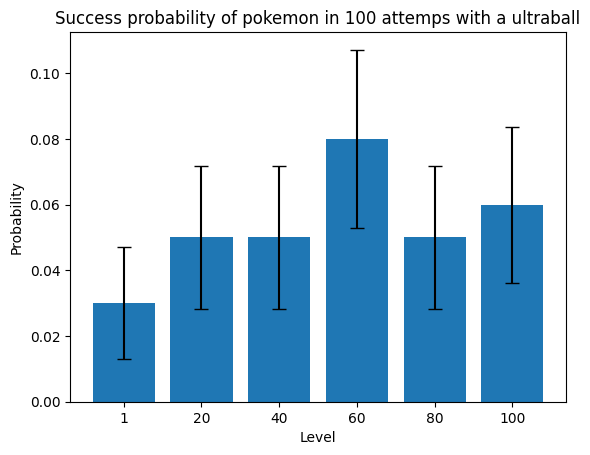

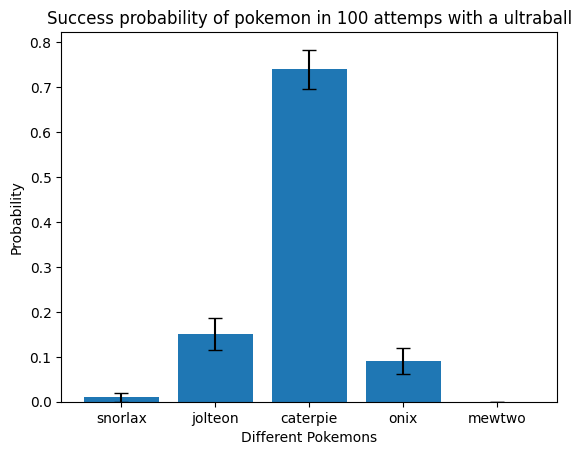

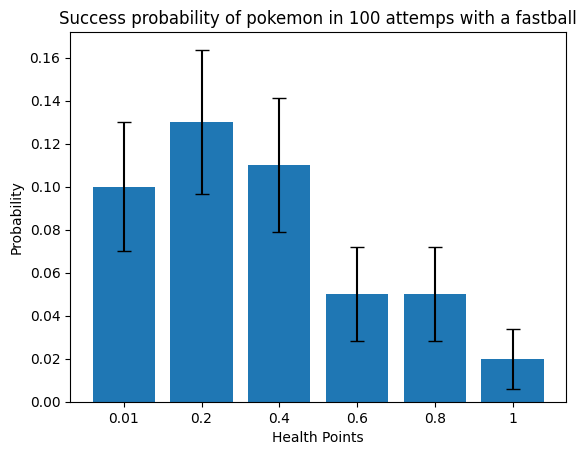

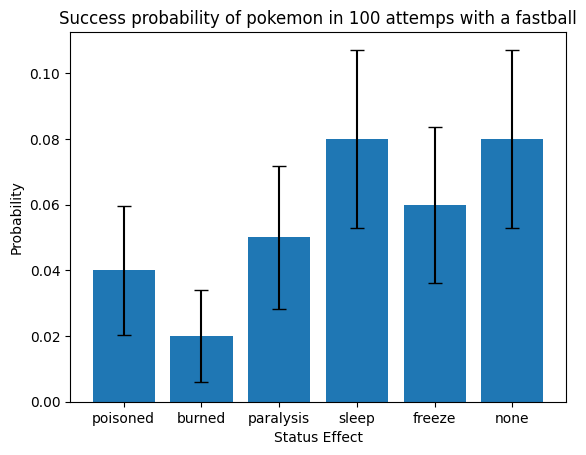

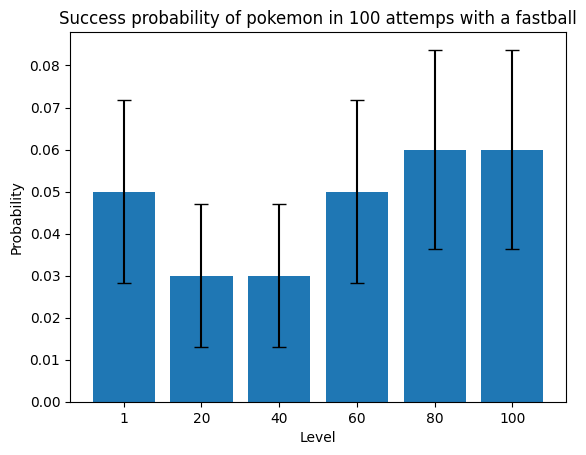

In [16]:
factory = PokemonFactory("pokemon.json")
#Mismo pokemon,nivel y estado. Variacion en la vida
snorlax1 = factory.create("snorlax", 100, StatusEffect.NONE, 0.01)
snorlax2 = factory.create("snorlax", 100, StatusEffect.NONE, 0.2)
snorlax3 = factory.create("snorlax", 100, StatusEffect.NONE, 0.4)
snorlax4 = factory.create("snorlax", 100, StatusEffect.NONE, 0.6)
snorlax5 = factory.create("snorlax", 100, StatusEffect.NONE, 0.8)
snorlax6 = factory.create("snorlax", 100, StatusEffect.NONE, 1)

#Mismo pokemon,nivel y vida. Variacion en el estado
snorlax7 = factory.create("snorlax", 100, StatusEffect.POISON, 1)
snorlax8 = factory.create("snorlax", 100, StatusEffect.BURN , 1)
snorlax9 = factory.create("snorlax", 100, StatusEffect.PARALYSIS, 1)
snorlax10 = factory.create("snorlax", 100, StatusEffect.SLEEP, 1)
snorlax11 = factory.create("snorlax", 100, StatusEffect.FREEZE, 1)
snorlax12 = factory.create("snorlax", 100, StatusEffect.NONE, 1)

#Mismo pokemon,vida y estado. Variacion en el nivel
snorlax13 = factory.create("snorlax", 1, StatusEffect.NONE, 1)
snorlax14 = factory.create("snorlax", 20, StatusEffect.NONE , 1)
snorlax15 = factory.create("snorlax", 40, StatusEffect.NONE, 1)
snorlax16 = factory.create("snorlax", 60, StatusEffect.NONE, 1)
snorlax17 = factory.create("snorlax", 80, StatusEffect.NONE, 1)
snorlax18 = factory.create("snorlax", 100, StatusEffect.NONE, 1)


pokemon_groups = [[snorlax1,snorlax2,snorlax3,snorlax4,snorlax5,snorlax6],[snorlax7,snorlax8,snorlax9,snorlax10,snorlax11,snorlax12],[snorlax13,snorlax14,snorlax15,snorlax16,snorlax17,snorlax18]]
paramter_changed = ["Health Points","Status Effect","Level","Different Pokemons"]
pokeballs=["pokeball", "ultraball", "fastball", "heavyball"]
num_runs = 100
pokemons_names=[["0.01","0.2", "0.4", "0.6", "0.8","1"],["poisoned","burned","paralysis", "sleep", "freeze","none"],["1","20", "40", "60", "80","100"],["snorlax","jolteon", "caterpie", "onix", "mewtwo"]]
prob_variation = []
for pokeball in pokeballs:
    for index, pokemons in enumerate(pokemon_groups):
        success_probs = []
        error_probs = []
        for pokemon in pokemons:  
            successes = 0  
            for i in range(num_runs):
                success, prob = attempt_catch(pokemon,pokeball)
                if success:
                    successes += 1
            success_prob = successes / num_runs
            error_prob = np.sqrt(success_prob * (1 - success_prob) / num_runs)
            success_probs.append(success_prob)
            error_probs.append(error_prob)
        #prob_variation.append(np.mean(np.array(success_probs)))
        plt.bar(pokemons_names[index], success_probs, yerr=error_probs, capsize=5)
        plt.xlabel(paramter_changed[index])
        plt.ylabel('Probability')
        plt.title('Success probability of pokemon in {} attemps with a {}'.format(num_runs, pokeball))
        plt.show()